In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords

In [ ]:
#Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Load the dataset
df = pd.read_csv("/content/archive.zip")

In [ ]:
#Shape of the dataset and sample 10 rows
print(df.shape)
df.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
# Basic info about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
#Summary of the dataset
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
#sentiment count
print(df.value_counts('sentiment'))

sentiment
negative    25000
positive    25000
Name: count, dtype: int64


Hence, Balanced data


In [ ]:
#Check for missing values
print("Missing values:", df.isnull().sum().sum())

Missing values: 0


In [ ]:
# Check for duplicate rows
print("Duplicate rows before removal:", df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Confirm duplicates are removed
print("Duplicate rows after removal:", df.duplicated().sum())

Duplicate rows before removal: 418
Duplicate rows after removal: 0


In [ ]:
#sentiment count
print(df.value_counts('sentiment'))

sentiment
positive    24884
negative    24698
Name: count, dtype: int64


<ipython-input-11-0a2f1c84b3cf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


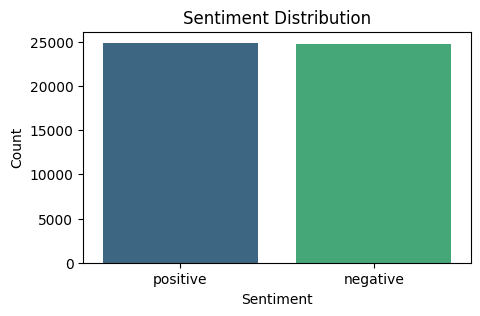

In [ ]:
#Distribution of sentiment
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

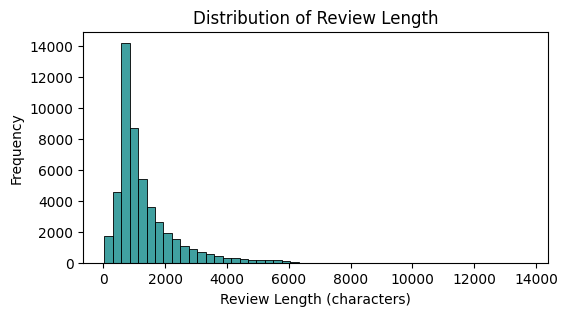

In [ ]:
#Distribution of review length
df['review_length'] = df['review'].apply(len)
plt.figure(figsize=(6, 3))
sns.histplot(df['review_length'], bins=50, color="teal")
plt.title("Distribution of Review Length")
plt.xlabel("Review Length (characters)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Joining all positive and negative reviews into two long strings
positive_text = " ".join(df[df['sentiment'] == 'positive']['review'])
negative_text = " ".join(df[df['sentiment'] == 'negative']['review'])

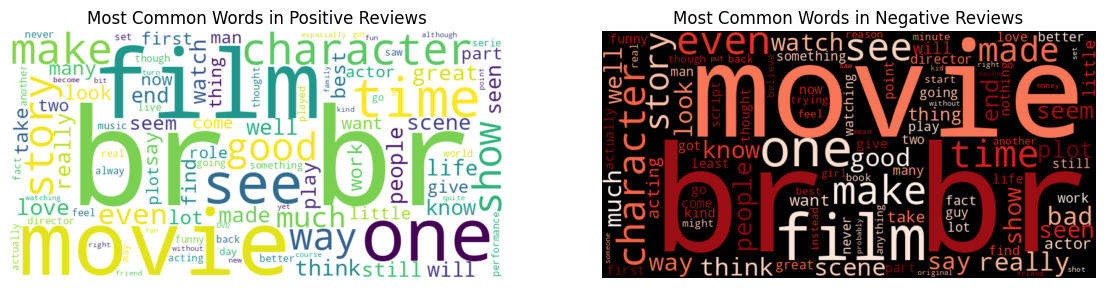

In [ ]:
#Word Clouds for Positive and Negative Reviews
plt.figure(figsize=(14, 7))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(positive_text)
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Most Common Words in Positive Reviews")
plt.axis('off')

wordcloud_negative = WordCloud(width=800, height=400, background_color='black', max_words=100, colormap='Reds').generate(negative_text)
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Most Common Words in Negative Reviews")
plt.axis('off')
plt.show()

In [ ]:
#Function cleaning
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()  # Remove non-alphabet characters and convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

In [ ]:
#Cleaning reviews
df['cleaned_review'] = df['review'].apply(clean_text)

In [ ]:
# Converting to binary values
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [ ]:
X = df['cleaned_review']
y = df['sentiment']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Vectorize the text data
vectorizer = CountVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
#Train and evaluate Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_vec, y_train)
log_y_pred = log_model.predict(X_test_vec)
log_accuracy = accuracy_score(y_test, log_y_pred)
print(f"Logistic Regression Accuracy: {log_accuracy * 100:.2f}%")

Logistic Regression Accuracy: 86.80%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


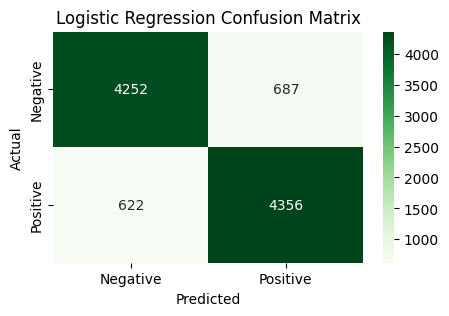

In [ ]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(5, 3))
log_cm = confusion_matrix(y_test, log_y_pred)
sns.heatmap(log_cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#Train and evaluate Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_y_pred = nb_model.predict(X_test_vec)

nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")

Naive Bayes Accuracy: 84.73%


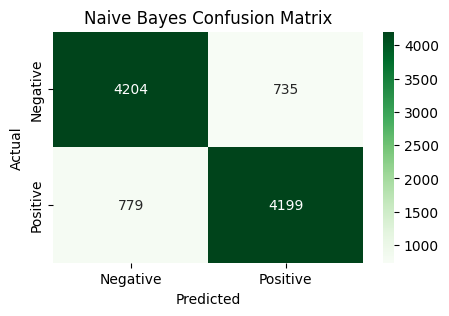

In [ ]:
# Confusion Matrix for Naive Bayes
plt.figure(figsize=(5,3))
nb_cm = confusion_matrix(y_test, nb_y_pred)
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Thank you.